# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Saepul Bahri
- **Email:** bahreesaepul1@gmail.com
- **ID Dicoding:** bahree36


## 1 - Determine the Business Questions


**There are several questions that need to be answered in this analysis:**

- What is the distributions of casual and registered rides in different seasons?
- What is the pattern between variables in bike_hour data?


## 2 - Imports All Requiered Libraries


In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

#There are some warning in different libraries, this help to exclude them from final notebook.
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore")

## 3 - Data Wrangling


### 3.1 Gathering Data


In [2]:
# Reading data from csv
file_day_path = os.getcwd().replace("\\", "/") + "/data/day.csv"
file_hour_path = os.getcwd().replace("\\", "/") + "/data/hour.csv"

bike_day = pd.read_csv(file_day_path)
bike_hour = pd.read_csv(file_hour_path)

### 3.2 Assesing the Data


In [3]:
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset descriptions:

| Variable   | Description                                                                                                                                                                                                                                                                                |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| instant    | Record index                                                                                                                                                                                                                                                                               |
| dteday     | Date                                                                                                                                                                                                                                                                                       |
| season     | Season (1: spring, 2: summer, 3: fall, 4: winter)                                                                                                                                                                                                                                          |
| yr         | Year (0: 2011, 1: 2012)                                                                                                                                                                                                                                                                    |
| mnth       | Month (1 to 12)                                                                                                                                                                                                                                                                            |
| hr         | Hour (0 to 23)                                                                                                                                                                                                                                                                             |
| holiday    | Weather day is holiday or not (extracted from [Web Link])                                                                                                                                                                                                                                  |
| weekday    | Day of the week                                                                                                                                                                                                                                                                            |
| workingday | If day is neither weekend nor holiday is 1, otherwise is 0.                                                                                                                                                                                                                                |
| weathersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp       | Normalized temperature in Celsius (derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39)                                                                                                                                                                                               |
| atemp      | Normalized feeling temperature in Celsius (derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50)                                                                                                                                                                                      |
| hum        | Normalized humidity (values divided by 100)                                                                                                                                                                                                                                                |
| windspeed  | Normalized wind speed (values divided by 67)                                                                                                                                                                                                                                               |
| casual     | Count of casual users                                                                                                                                                                                                                                                                      |
| registered | Count of registered users                                                                                                                                                                                                                                                                  |
| cnt        | Count of total rental bikes (including both casual and registered)                                                                                                                                                                                                                         |

<small>Table 1 - Dataset descriptions</small>


bike_hour dataframe is hourly data of bike sharing dataset and bike_day is a daily dataset. So we can group the data by date (dteday column) in bike_hour df. From this process we will find that the sum of 'cnt' or 'registered' or 'casual' is equal to these values in bike_day df.


In [5]:
bike_hour.groupby('dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

By comparing the values we found that bike_day and bike_hour are about the same days, which is 731 days from 2011-01-01 until 2012-12-31.


In [6]:
# Get basic informations and the shape of the data.
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Get basic informations and the shape of the data.
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Based on the basic information of the datasets there's do not appear to be any missing values
# So let's confirm that

print("01 - BIKE DAY")
print(bike_day.isna().sum())
print("-----------------------------------------")
print("02 - BIKE HOUR")
print(bike_hour.isna().sum())


01 - BIKE DAY
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-----------------------------------------
02 - BIKE HOUR
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**💡 INSIGHTS:**

- Number of entries:
  - The bike_day dataset consist of 731 non-null entries, ranging from 0 to 730.
  - The bike_hour dataset consist of 17379 non-null entries, ranging from 0 to 17378.
- Columns:
  - The bike_day dataset consist of 16 columns.
  - The bike_hour dataset consist of 17 columns.
- Missing Values: There don't appear to be any missing values in the dataset.


### 3.3 Cleaning Data


In [9]:
# Check for duplicates data in dataset (bike_day dataset)
duplicate = bike_day[bike_day.duplicated()]
duplicate

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [10]:
# Check for duplicates data in dataset (bike_hour dataset)
duplicate = bike_hour[bike_hour.duplicated()]
duplicate

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [11]:
# Normalize the columns name
column_mapping = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

bike_day.rename(columns=column_mapping, inplace=True)
bike_day.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
# Normalize the columns name
column_mapping = {'dteday': 'date', 'yr': 'year', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}

bike_hour.rename(columns=column_mapping, inplace=True)
bike_hour.head()

,instant,date,season,year,mnth,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# Changing the season name to it's real name (refers to Table 1) ot make the data easier to understand
bike_hour['season'] = bike_hour['season'].astype('category')
bike_hour['season'] = bike_hour['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

**💡 INSIGHTS:**

- Fortunately ther's no missing values in both datasets.
- The only things we did wa normalizing the columns name.


## 4. Exploratory Data Analysis (EDA) and Explanatory Analysis


#### 4.1 What is the distributions of casual and registered rides in different seasons?


In [14]:
# Let's group the data by seasons
bike_hour.groupby(['date', 'season'])[['casual', 'registered']].sum()

casual  registered
date       season                    
2011-01-01 Winter     331         654
           Spring       0           0
           Summer       0           0
           Autumn       0           0
2011-01-02 Winter     131         670
...                   ...         ...
2012-12-30 Autumn       0           0
2012-12-31 Winter     439        2290
           Spring       0           0
           Summer       0           0
           Autumn       0           0

[2924 rows x 2 columns]

> NOTE: <br>Most of the data are not visible here mainly because it's too long. So we need to find a better way.


<AxesSubplot: xlabel='season', ylabel='ride per day'>

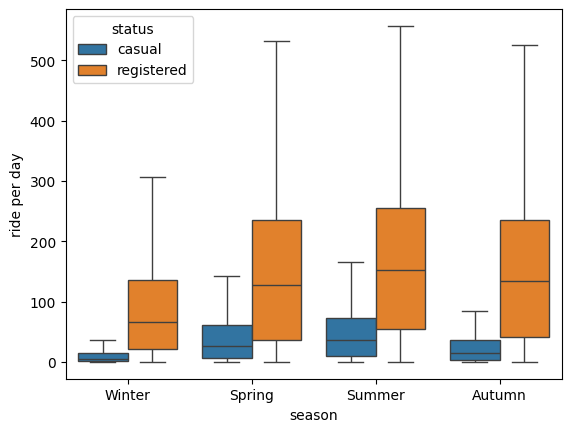

In [15]:
df = bike_hour[['season','casual','registered']]
melted_df = pd.melt(df,id_vars='season', var_name='status',value_name= 'ride per day')
sns.boxplot(data = melted_df, x='season', y= 'ride per day',hue='status', showfliers=False)

**💡 INSIGHT:**

- There are less casual riding compared to registered riding.
- There is less casual riding in winter and autumn compared to spring and summer.
- There is seems to be not much changes in registered riding in spring, summer and autumn but ther's a little decline in winter.


#### 4.2 What is the pattern between variables in bike_hour data?


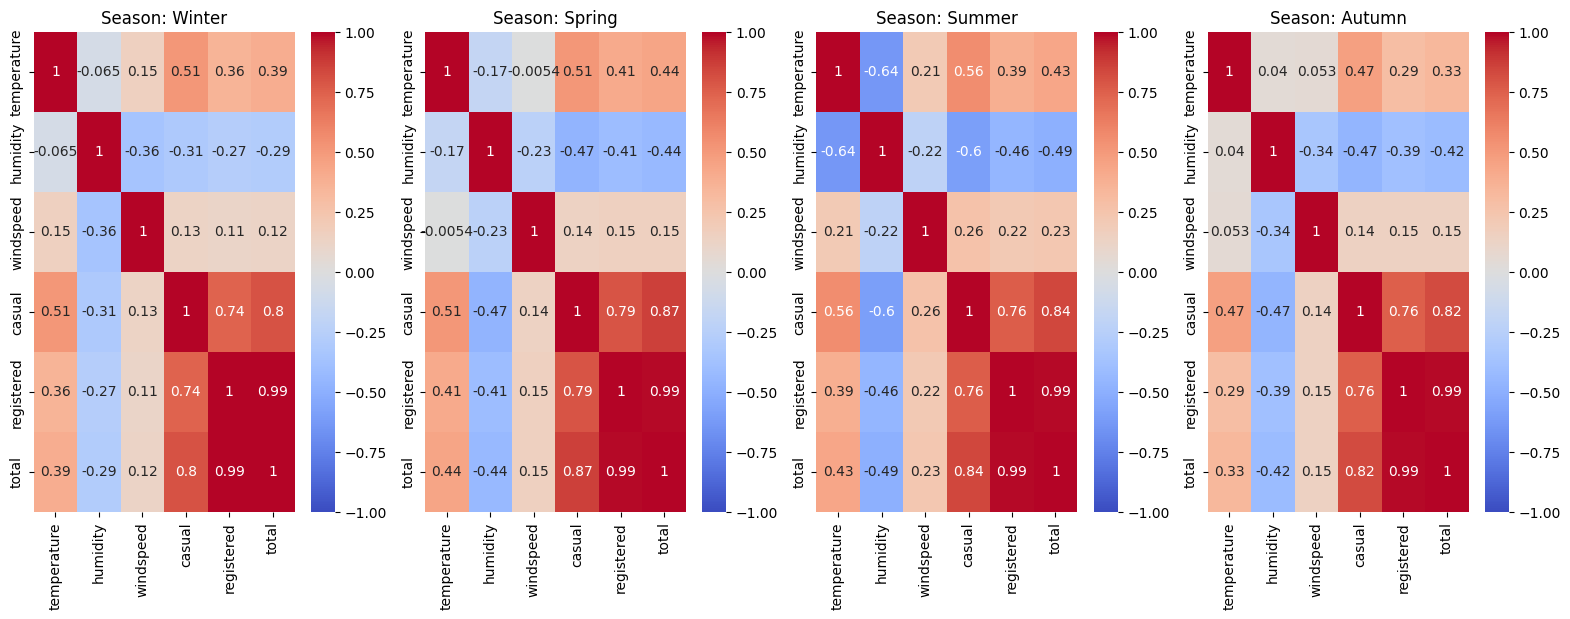

In [16]:
variable_df = bike_hour[['season','temperature','humidity','windspeed','casual','registered','total']]

fig, axes = plt.subplots(1, 4, figsize=(15, 6))  

# Loop through unique season values in the 'season' column
for i, season in enumerate(variable_df["season"].unique()):
    season_name =  season # Get season name from dictionary

    season_data = variable_df[variable_df["season"] == season]

    # Plot heatmap on the current subplot
    corr_matrix = season_data.corr(numeric_only=True, method='spearman')
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Season: {season_name}")


plt.subplots_adjust(left=1, right=2, top=0.9, bottom=0.1)

plt.show()

**💡 INSIGHT:** <br/>

- It shows that for casual riding it has good correlations with humidity in summer with value of -0.6.


## 5. Conclusion


#### Question 1: What is the distribution of casual and registered rides in different season?

Casual bike riding is more seasonal, with higher usage in spring and summer and a decline in autumn and winter. In contrast, registered riding remains stable across the seasons, with only a slight drop in winter. Registered riders consistently outnumber casual riders, suggesting regular, practical use of the service.


#### Question 2: What is the pattern between variables in bike_hour data?

Casual riding has a negative correlations with humidity (-0.6), meaning when the humidity is increasing there will be less casual riding and vice versa.


In [19]:
# Saves the file into dashborad directory

bike_day.to_csv(os.getcwd().replace("\\", "/") + "/dashboard/cleaned_file_day.csv", index=False)
bike_hour.to_csv(os.getcwd().replace("\\", "/") + "/dashboard/cleaned_file_hour.csv", index=False)